In [1]:
import pandas as pd
import numpy as np

from src.tracking.algorithm import EyeTracker
from src.tracking.visualization import *

### Parameters Settings

In [2]:
# Initialization of Gaze Data
GD = pd.read_csv("test1.csv")
x, y = np.array(GD["x"]), np.array(GD["y"])

In [3]:
# Parameters Settings
sampling_rate = 200      # 1/T = 1000Hz

# Setup
distance      = 450       # mm
height        = 113       # mm
res_height    = 1080

# Fixation and Saccade Threshold
sac_min_thres = 130       # degree
sac_max_thres = 750       # degree
fix_max_thres = 50        # degree

#Initialization of EyeTracker
ET = EyeTracker(sampling_rate, distance, height, res_height, sac_min_thres, sac_max_thres, fix_max_thres)

sac min:  9809.462394182532 
Sac max:  56593.05227412999 
Fix max:  3772.8701516086658


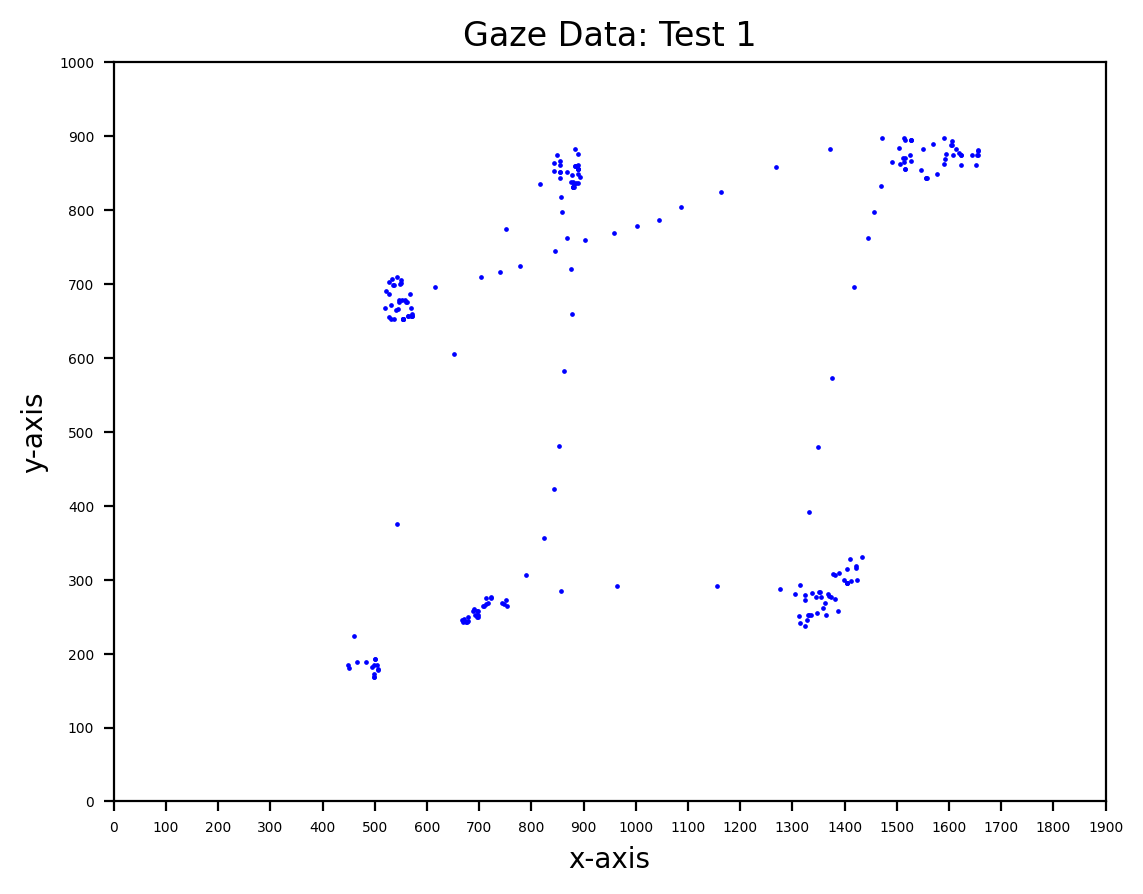

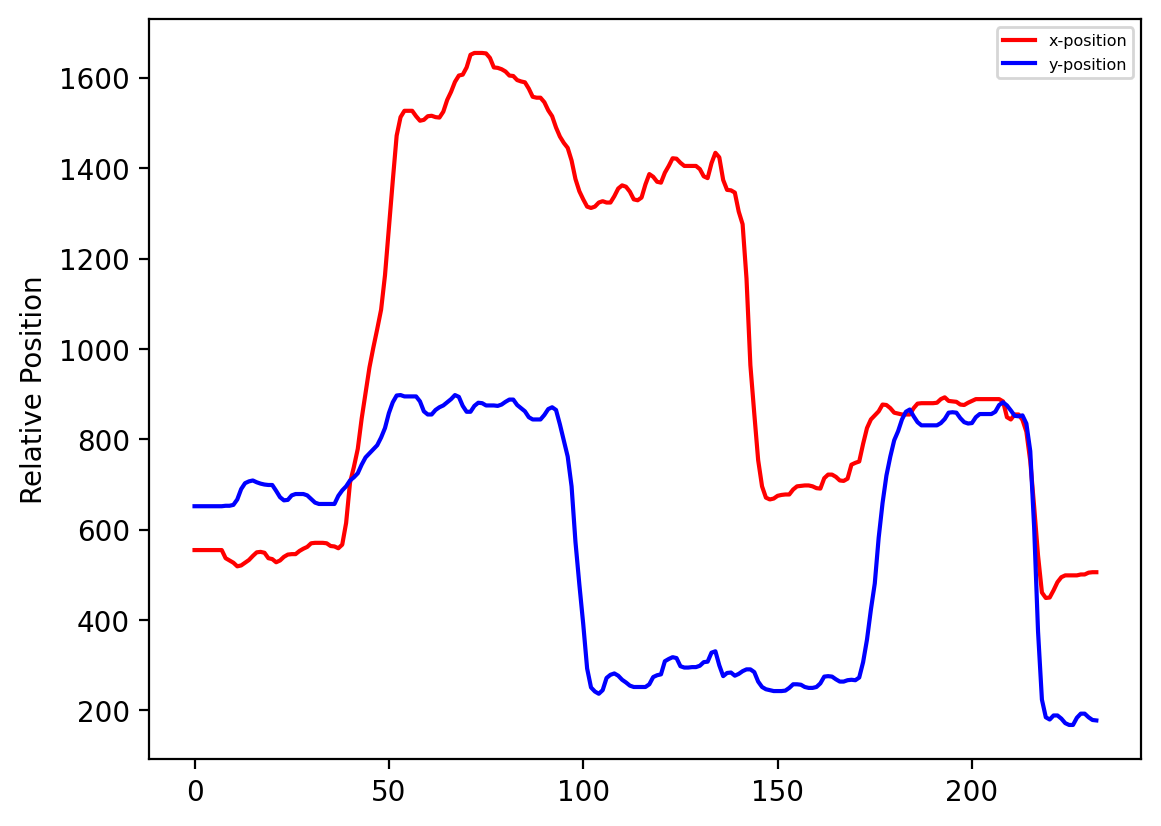

In [4]:
plot_gaze_data(x, y, "Test 1")
plot_relative_position(x, y)

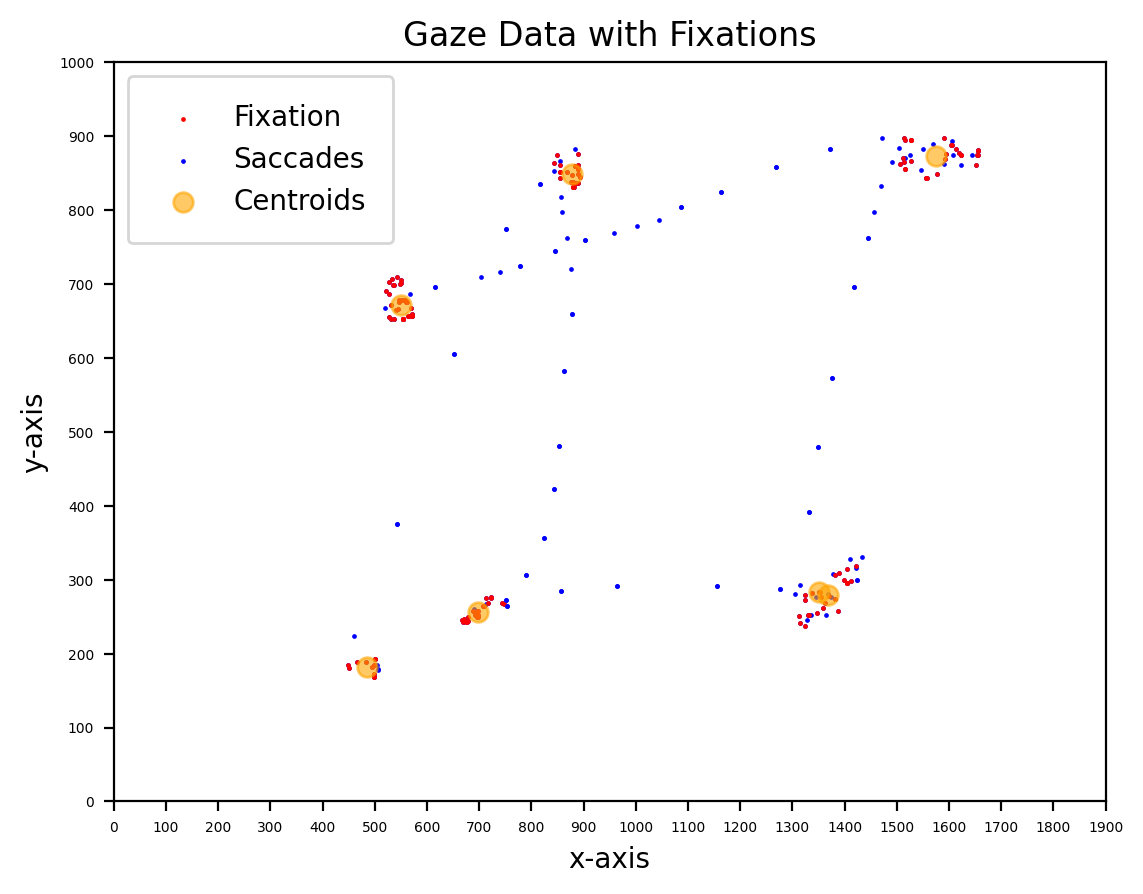

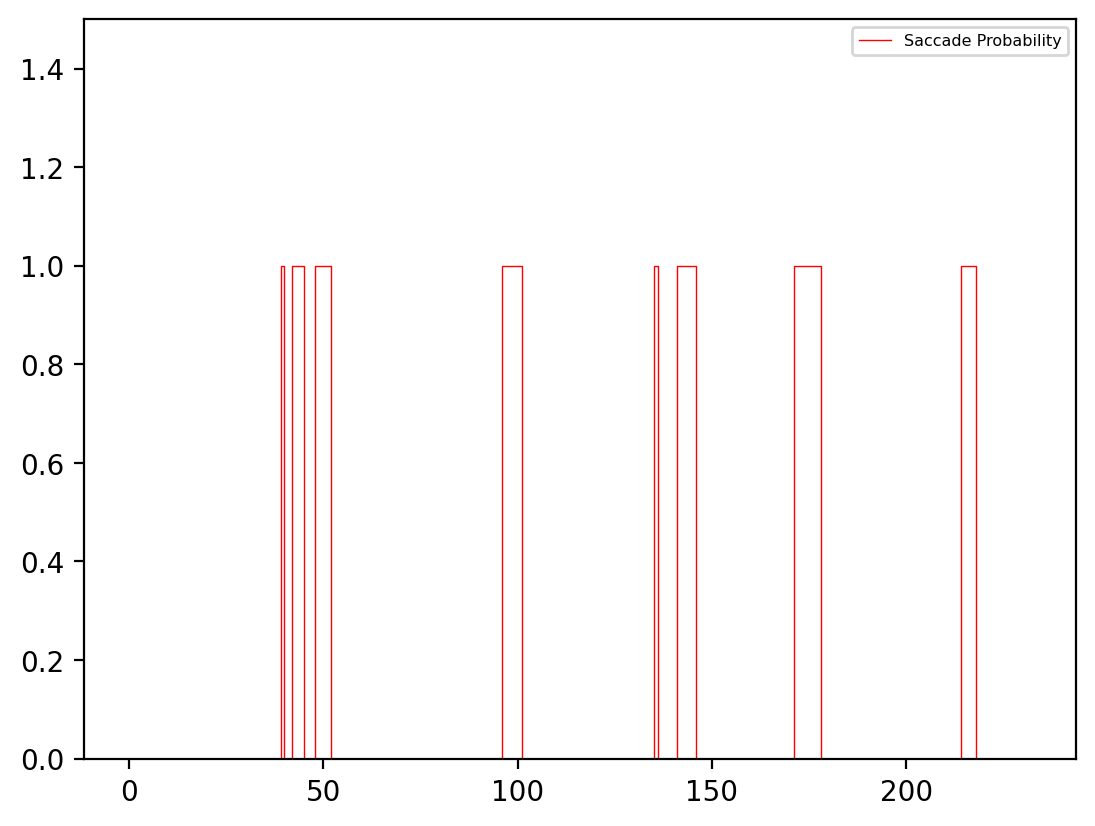

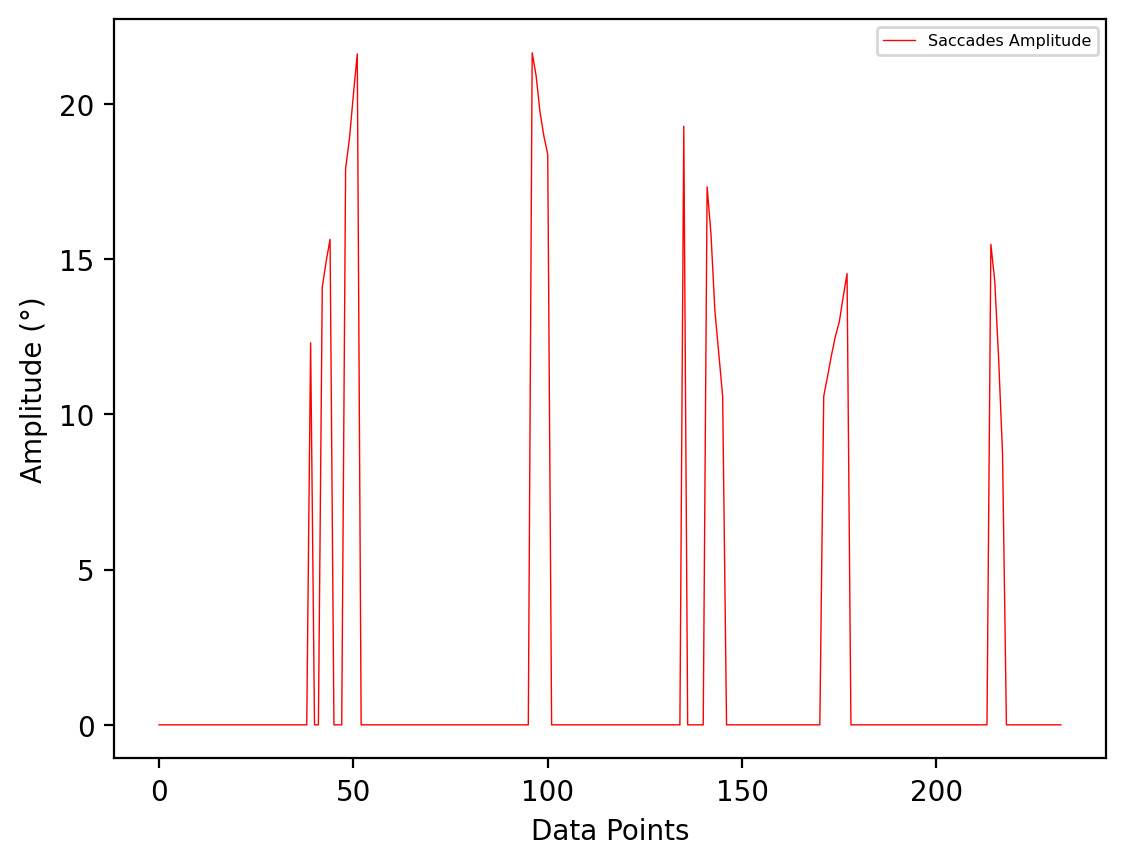

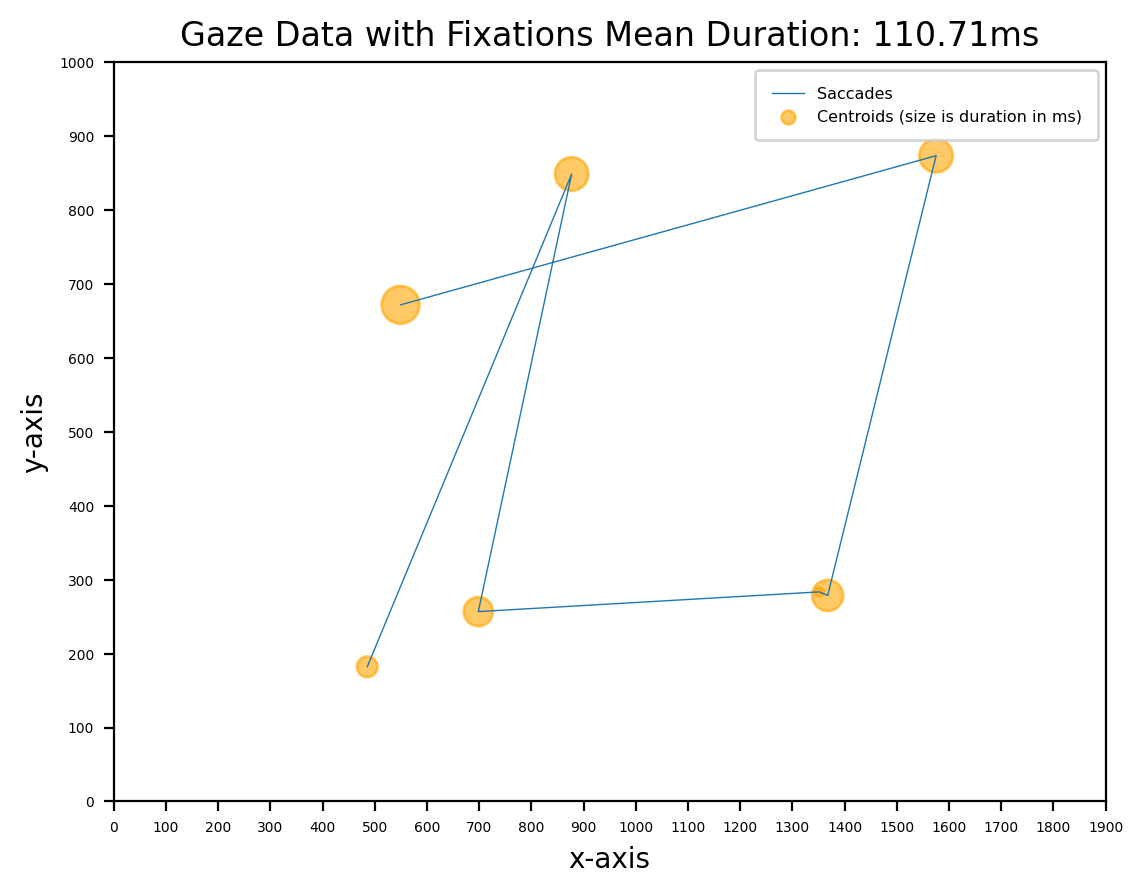

Average Fixation Durations 110.71428571428571
Number of Fixations:  7
Fixation Durations:  [185.0, 145.0, 125.0, 10.0, 110.0, 145.0, 55.0]
Centroids x-axis:  [549.4594594594595, 1575.2068965517242, 1367.52, 1351.5, 698.4090909090909, 877.1724137931035, 485.6363636363636]
Centroids y-axis:  [671.8108108108108, 873.551724137931, 278.64, 283.5, 256.8181818181818, 848.8275862068965, 182.0909090909091]


In [5]:
# detecting fixations
[fixation_index, saccades_index, velocity] = ET.detect_fixation(x, y, False)    
# plot_velocity(velocity, sac_min_thres=ET.angle2pix(sac_min_thres), fix_max_thres=ET.angle2pix(fix_max_thres)) # plotting velocity against gaze sample
fixation = [index for sublist in fixation_index for index in sublist]
saccades = [index for sublist in saccades_index for index in sublist]

# Calculating centroids
[centroid_x, centroid_y] = ET.get_centroids()                                   

# Plot gaze data with detected fixations in red, saccades in blue and centroids
plot_gaze_data(x, y, 's1', fixation, saccades, centroid_x, centroid_y)

# Plotting saccades probability
plot_saccades_prob(x, saccades)


# Calculating saccades amplitude
saccades_amplitude = ET.get_saccades_amplitude()
plot_saccade_amplitude(x, saccades, saccades_amplitude)

# Calculating Durations in ms
[mean_duration, duration] = ET.get_durations()                                  

# Plotting Centroid and Duration
plot_centroid_duration(centroid_x, centroid_y, duration, mean_duration)

print('Average Fixation Durations', mean_duration)
print('Number of Fixations: ',  len(fixation_index))

print('Fixation Durations: ', duration)
print('Centroids x-axis: ', centroid_x)
print('Centroids y-axis: ', centroid_y)


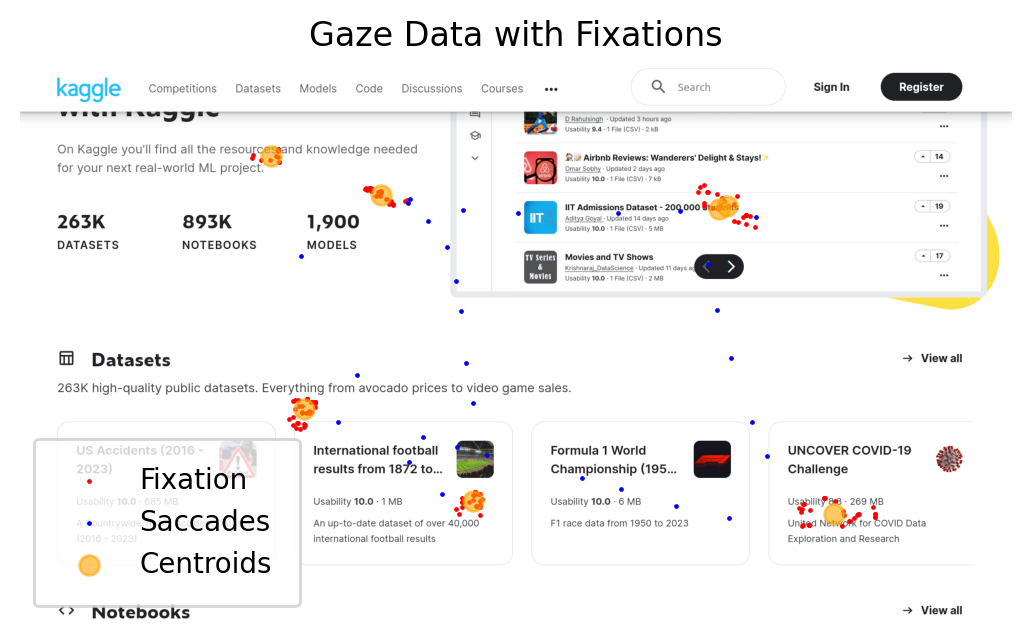

In [6]:
import cv2

scr = cv2.cvtColor(cv2.imread("scr1.png"), cv2.COLOR_BGR2RGB)

plt.imshow(scr)
fix_x = x[fixation]
fix_y = y[fixation]
plt.scatter(fix_x, fix_y, s=0.5, color="red", label="Fixation")
sac_x = x[saccades]
sac_y = y[saccades]
plt.scatter(sac_x, sac_y, s=0.5, color="blue", label="Saccades")
plt.scatter(centroid_x, centroid_y, s=50, alpha=0.6, color="orange", label="Centroids")
plt.legend(borderpad=1)
plt.title("Gaze Data with Fixations")

plt.xticks(range(0, 1920, 100))
plt.yticks(range(0, 1080, 100))
plt.tick_params(axis="both", which="major", labelsize=5)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.axis("off")
plt.show()